In [1]:
from raices import newton, biseccion_bidimensional
from derivada import calc_fd, calc_cd, diferencias_finitas
from integral import gauInt
from edo import euler, euler_atras, rk4
from interpolacion import legendre, general, interpolate, computecs, splineinterp
from fitting import phi, normalfit
import matplotlib.pyplot as plt
import numpy as np

# Raíces

In [11]:
# np.cos(x)-x
# -np.sin(x)-1
# np.pi/4
newton()

Método de Newton, para introducir funciones de numpy, escribir primero np.
El procedimiento fue exitoso y la raíz obtenida es 0.739085133215161
se hicieron 3 iteraciones


In [12]:
# x**2+y**2-4
#x-y
#-3,3
#-3,3
biseccion_bidimensional()

Las raíces de las funciones son x = -0.37518310546875, y = -1.50018310546875
se hicieron 15 iteraciones


# Integrales

In [6]:
# Define la función
def f(x):
    return np.sin(x) * np.exp(-0.1 * x)

# Intervalos y número para la cuadratura
interv = [0., 10.]
N = 4

# Llamada a la función de integración
result = gauInt(f, interv, N)
print('El resultado es ', abs(result))




El resultado es  1.4251000861358998


# Derivadas

Analytical derivative at x = 0.5: 2.506761534986893

Forward Difference Method:
h: 1e-01, Derivative: 2.1990570766492690, Absolute Error: 0.3077044583376241
h: 1e-02, Derivative: 2.4807256192968197, Absolute Error: 0.0260359156900734
h: 1e-03, Derivative: 2.5042064928371133, Absolute Error: 0.0025550421497798
h: 1e-04, Derivative: 2.5065065168927703, Absolute Error: 0.0002550180941228
h: 1e-05, Derivative: 2.5067360380326420, Absolute Error: 0.0000254969542510
h: 1e-06, Derivative: 2.5067589857208361, Absolute Error: 0.0000025492660569
h: 1e-07, Derivative: 2.5067612785534266, Absolute Error: 0.0000002564334665
h: 1e-08, Derivative: 2.5067615538887367, Absolute Error: 0.0000000189018436
h: 1e-09, Derivative: 2.5067619091601046, Absolute Error: 0.0000003741732115
h: 1e-10, Derivative: 2.5067636855169440, Absolute Error: 0.0000021505300509
h: 1e-11, Derivative: 2.5067947717616335, Absolute Error: 0.0000332367747404

Central Difference Method:
h: 1e-01, Derivative: 2.4932959255171205, Abs

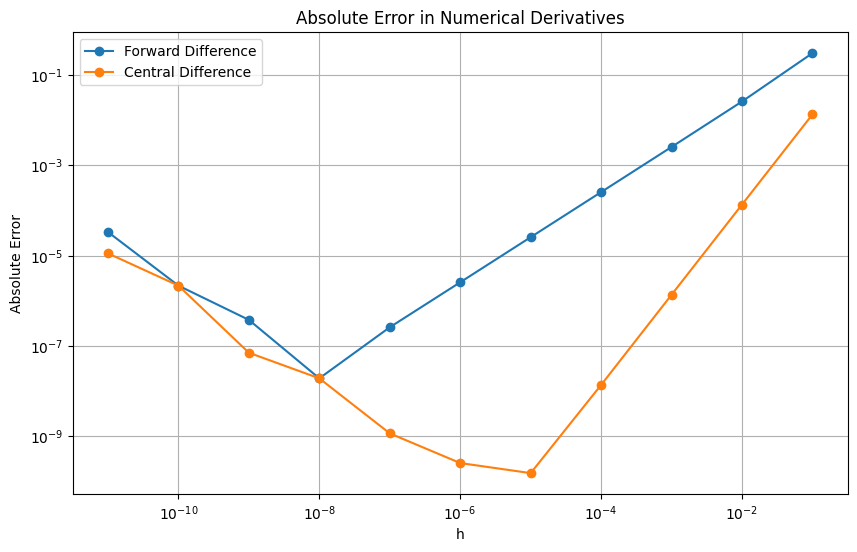

In [2]:
# Función
def f(x):
    return np.exp(np.sin(2*x))

# Derivada de la función
def fprime(x):
    return 2*np.exp(np.sin(2*x))*np.cos(2*x)

# valor de x y tamaños de paso
x = 0.5
hs = [10**(-i) for i in range(1,12)]

# Calculamos las derivadas analítica, de diferencia hacia adelante y central, y sus errores absolutos para cada tamaño de paso
results = [diferencias_finitas(f, fprime, x, h) for h in hs]
an_values, fd_values, fd_errors, cd_values, cd_errors = zip(*results)

# Impresión de los resultados
print(f"Analytical derivative at x = {x}: {an_values[0]}")
print("\nForward Difference Method:")
for h, fd, fd_error in zip(hs, fd_values, fd_errors):
    print(f"h: {h:1.0e}, Derivative: {fd:1.16f}, Absolute Error: {fd_error:1.16f}")

print("\nCentral Difference Method:")
for h, cd, cd_error in zip(hs, cd_values, cd_errors):
    print(f"h: {h:1.0e}, Derivative: {cd:1.16f}, Absolute Error: {cd_error:1.16f}")

# Grafica los errores absolutos
plt.figure(figsize=(10,6))
plt.loglog(hs, fd_errors, marker='o', label='Forward Difference')
plt.loglog(hs, cd_errors, marker='o', label='Central Difference')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.title('Absolute Error in Numerical Derivatives')
plt.show()

# Ecuaciones diferenciales ordinarias

<Figure size 640x480 with 0 Axes>

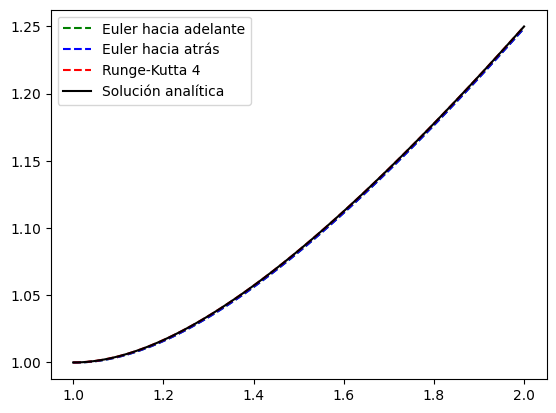

In [3]:
def f(x, y):
    return (x-y)/x

# Parámetros iniciales
a = 1
b = 2
n = 100
y0 = 1

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)

c = -0.5
anl = lambda x: (x/2)-(c/x)

# Calcular la solución analítica
yval_analitica = anl(xi)

plt.figure()

fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()

plt.close()

# Interpolación

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


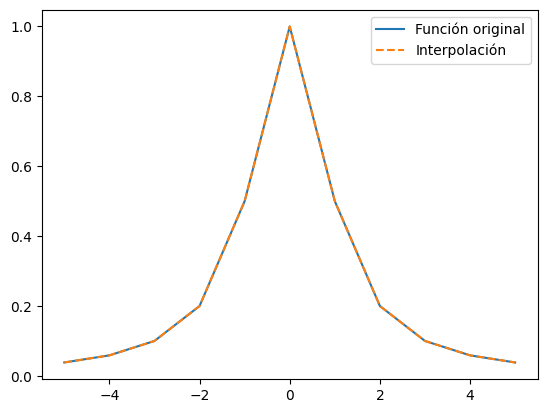

In [5]:
# función
func = lambda x: 1/(1+x**2)

# puntos de datos
dataxs = np.linspace(-5,5,11)

# valores de la interpolación
pofx_values = interpolate(func, dataxs)

# Imprimir los resultados de cada interpolación en cada punto
for i, pofx in enumerate(pofx_values):
    print(f"El resultado de la interpolación en el punto {dataxs[i]} es {pofx}")

# Gráfica función original
plt.plot(dataxs, func(dataxs), label='Función original')

# Gráfica interpolación
plt.plot(dataxs, pofx_values, '--', label='Interpolación')

plt.legend()

plt.show()

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


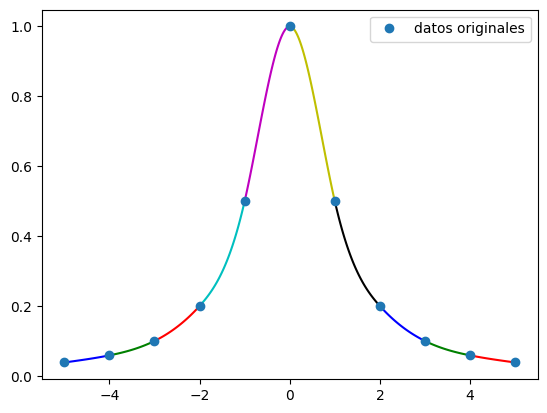

In [2]:
func = lambda x: 1/(1+x**2)

# Datos para x y y
dataxs = np.linspace(-5,5,11) 
datays = func(dataxs)

# coeficientes del spline cúbico
cs = computecs(dataxs, datays)

# Resultados
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(dataxs)-1):
    xi = np.linspace(dataxs[i], dataxs[i+1], 100)
    yi = [splineinterp(dataxs, datays, cs, x_val) for x_val in xi]
    plt.plot(xi, yi, colors[i % len(colors)])

# Graficar los puntos de datos originales
plt.plot(dataxs, datays, 'o', label='datos originales')

# Imprimir los resultados de la interpolación en cada punto
for i, x_val in enumerate(dataxs):
    pofx = splineinterp(dataxs, datays, cs, x_val)
    print(f"El resultado de la interpolación en el punto {x_val} es {pofx}")

plt.legend()
plt.show()

# Fitting


El valor para \chi^2 es  129.86930693069309
El valor para \chi^2 por grado de libertad es:  14.429922992299232
El valor de los parámetros c_i son  [0.38811881 0.02811881]

El valor para \chi^2 es  127.49777985405322
El valor para \chi^2 por grado de libertad es:  15.937222481756653
El valor de los parámetros c_i son  [3.06698241e+00 7.26158688e-03 3.71525901e-05]


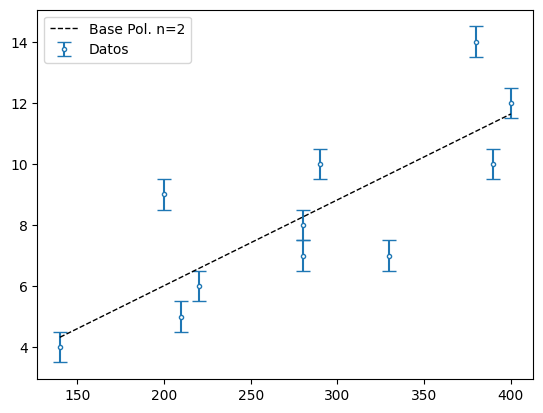

In [4]:
np.random.seed(45379)
dataxs = np.array([200,220,400,330,210,390,280,140,280,290,380])
datays = np.array([9,6,12,7,5,10,8,4,7,10,14])
datasigs = 0.5

cs_lineal = None
cs_cuadratico = None
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)
    print()
    print('El valor para \\chi^2 es ', chisq)
    print('El valor para \\chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)

    if n == 2:
        cs_lineal = cs
    elif n == 3:
        cs_cuadratico = cs

modelo1 = lambda x, c0, c1: c0 + c1*x
modelo2 = lambda x, c0, c1, c2: c0 + c1*x + c2*x**2

xval = np.linspace(min(dataxs), max(dataxs), 100)
fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, modelo1(xval, *cs_lineal), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(cs_lineal))

plt.legend()
plt.show()